In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
from scipy.stats import ortho_group
import matplotlib.pyplot as plt
%matplotlib inline

# plot parameters
param = "param"
NUMBER_OF_POINTS = "NumberOfPoints"
NUMBER_OF_CLUSTERS = "NumberOfClusters"
NUMBER_OF_DIMENSIONS = "NumberOfDimensions"

assignment = ":="
end =";"
# plot parameters
colors = np.array(['blue','green','red','cyan','magenta','yellow','black'])
marker_size = 100
marker_alpha = 0.25
def GenCluster(n,mu,std,rot=True):
    d = len(mu)
    coords = np.random.normal(loc=mu,scale=std,size=(n,d))
    if rot == True:    
        Q = ortho_group.rvs(d)
        mu = np.array(mu)
        coords = np.matmul(coords-mu,Q)
        coords = coords + mu
    return coords

def GenerateClusters(num_points=[100,100,100],STD=[[1,1],[1,1],[1,1]],rot=True):
    num_points = np.array(num_points)
    STD = np.array(STD)
    (num_clusters,d) = STD.shape
    MU = np.random.uniform(low=-10,high=10,size=(num_clusters,d))
    N = num_points.sum()
    coords = np.zeros((N,d))
    labels = np.zeros(N,dtype='int')
    i0 = 0
    for k in np.arange(num_clusters): 
        n = num_points[k]
        mu = MU[k,:]
        std = STD[k,:]
        coords[i0:i0+n,:] = GenCluster(n,mu,std,rot=rot)
        labels[i0:i0+n]   = k
        i0 = i0 + n
    return (coords,labels)


In [3]:

# cluster parameters
num_points = [100,100,100]
STD = [[1,1],[1,1],[1,1]]
rot = True

(coords,labels) = GenerateClusters(num_points=num_points,STD=STD,rot=rot)

In [4]:
df = pd.DataFrame(coords, columns=['x','y'])
df.head()

,x,y
0,-9.172170,-3.201266
1,-7.932123,-2.450707
2,-9.945078,-5.739817
3,-7.180997,-4.269129
4,-7.995199,-4.456876


In [5]:
arr = df.values
for k in range(len(arr)):
    for i in range(2):
        print(k+1,i+1,arr[k][i])
        

1 1 -9.172170033351028
1 2 -3.201265914581967
2 1 -7.932123177105524
2 2 -2.450707253401812
3 1 -9.945077656212641
3 2 -5.73981655914484
4 1 -7.180997252161236
4 2 -4.269128604943155
5 1 -7.995198773200205
5 2 -4.456875705270187
6 1 -8.363174921212087
6 2 -3.6753098090113827
7 1 -7.180989513576632
7 2 -4.251404031809963
8 1 -9.292236156725679
8 2 -2.7315174765524244
9 1 -9.594199609242418
9 2 -3.51011292603238
10 1 -8.874071134512736
10 2 -4.414896731686562
11 1 -7.961939056306919
11 2 -3.6214022284560934
12 1 -9.02170680112562
12 2 -4.373227835866227
13 1 -7.567325342213817
13 2 -3.5865829376684992
14 1 -7.349522943250004
14 2 -4.79076534754323
15 1 -9.143785090438731
15 2 -3.963228380012424
16 1 -9.547052032513962
16 2 -4.323177943292139
17 1 -8.254866275347144
17 2 -4.010926957823401
18 1 -7.827059026199478
18 2 -2.8581560270468764
19 1 -8.97970362827649
19 2 -2.0858925045973065
20 1 -8.436260272315648
20 2 -4.126652096440831
21 1 -8.902563110292688
21 2 -4.584763382915243
22 1 -6.7

242 1 -6.369246312666339
242 2 -1.732994699400796
243 1 -6.618416161167494
243 2 -0.3427341600487315
244 1 -6.7219783813120015
244 2 0.7536222253668772
245 1 -7.9336275550858915
245 2 0.28243138163269943
246 1 -6.037523316242648
246 2 0.7665190303506092
247 1 -7.747443675973726
247 2 2.7386698829186322
248 1 -8.168342702067406
248 2 0.7360108905443989
249 1 -6.027656804340988
249 2 0.6842987702298142
250 1 -7.061053301225718
250 2 0.5693336555201959
251 1 -6.339394913406841
251 2 3.0148657286389478
252 1 -8.0301329268013
252 2 0.3207180959071153
253 1 -6.769067525873275
253 2 3.149668456928427
254 1 -6.153302579843922
254 2 -0.19570030177789843
255 1 -6.88281113810553
255 2 1.1189860236285565
256 1 -4.43836124254913
256 2 1.1016843060257546
257 1 -7.148570177039597
257 2 2.0108470798644933
258 1 -5.8920213445090805
258 2 1.6038312996123407
259 1 -3.8586395495752077
259 2 -0.24732478949315606
260 1 -6.228392987831321
260 2 -0.04649671933770261
261 1 -7.041139586443415
261 2 0.6485701442

In [6]:
df = df.reset_index()
df['Index'] = df.index+1

In [7]:
df.head()

,index,x,y,Index
0,0,-9.172170,-3.201266,1
1,1,-7.932123,-2.450707,2
2,2,-9.945078,-5.739817,3
3,3,-7.180997,-4.269129,4
4,4,-7.995199,-4.456876,5


Text(0.5, 1.0, 'KMeans Clusters')

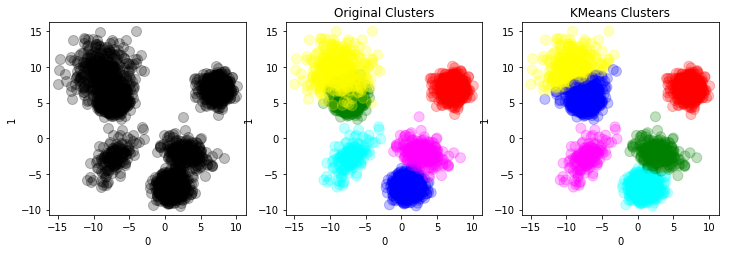

In [8]:
K = 6
num_points = [800,1000,600,150,260,350]
STD = [[1,1],[1,1],[1,1],[1,2],[2,1],[2,2]]
(coords,labels) = GenerateClusters(num_points=num_points,STD=STD)
df = pd.DataFrame(coords)
df['cluster'] = colors[labels]
labels_kmeans = KMeans(n_clusters=K).fit_predict(coords)
df['KMeans']  = colors[labels_kmeans]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha,ax=axes[0])
plot1.set_aspect('equal')
plot2 = df.plot.scatter(x=0,y=1,c=df.cluster.values,s=marker_size,alpha=marker_alpha,ax=axes[1])
plot2.set_aspect('equal')
plot2.set_title('Original Clusters')
plot3 = df.plot.scatter(x=0,y=1,c=df.KMeans.values,s=marker_size,alpha=marker_alpha,ax=axes[2])
plot3.set_aspect('equal')
plot3.set_title('KMeans Clusters')

In [9]:
df.to_csv('3CentroidTest_Points.csv')

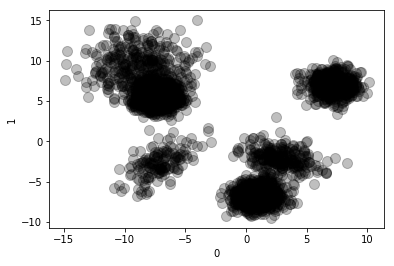

In [10]:
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha)

Text(0.5, 1.0, 'KMeans Clusters')

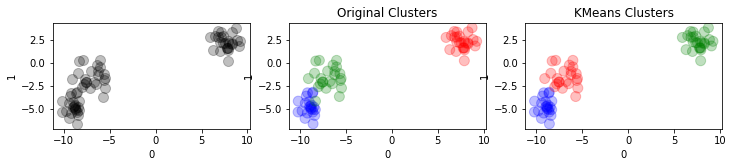

In [11]:
K = 3
num_points = [22,24,26]
STD = [[1,1],[1,1],[1,1]]
(coords,labels) = GenerateClusters(num_points=num_points,STD=STD)
df = pd.DataFrame(coords)
df['cluster'] = colors[labels]
labels_kmeans = KMeans(n_clusters=K).fit_predict(coords)
df['KMeans']  = colors[labels_kmeans]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha,ax=axes[0])
plot1.set_aspect('equal')
plot2 = df.plot.scatter(x=0,y=1,c=df.cluster.values,s=marker_size,alpha=marker_alpha,ax=axes[1])
plot2.set_aspect('equal')
plot2.set_title('Original Clusters')
plot3 = df.plot.scatter(x=0,y=1,c=df.KMeans.values,s=marker_size,alpha=marker_alpha,ax=axes[2])
plot3.set_aspect('equal')
plot3.set_title('KMeans Clusters')

In [12]:
output_dir="../ClusteringThesis/Clustering_Notebooks/Data/"
folder = "INF_NORM_TEST/"
dat_file_name = "3_by_1.dat"


In [17]:
output_dir = folder+dat_file_name
if not os.path.exists(folder):
    os.makedirs(folder)

In [18]:
fo = open(output_dir, "w+")
fo.write(param+NUMBER_OF_POINTS+assignment+"72"+end+"\n")
fo.write(param+NUMBER_OF_DIMENSIONS+assignment+"2"+end+"\n")
fo.write(param+NUMBER_OF_CLUSTERS+assignment+str(K)+end+"\n")
fo.write(param+"Point"+assignment+"\n")
arr = df.values
for k in range(len(arr)):
    for i in range(2):
        fo.write(str(k+1)+" "+str(i+1)+" "+str(arr[k][i])+"\n")
fo.write(end)
fo.close()


IsADirectoryError: [Errno 21] Is a directory: 'INF_NORM_TEST/3_by_1.dat'